Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Descriptive Statistics for Headline Lengths:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Number of Articles per Publisher:
 publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64



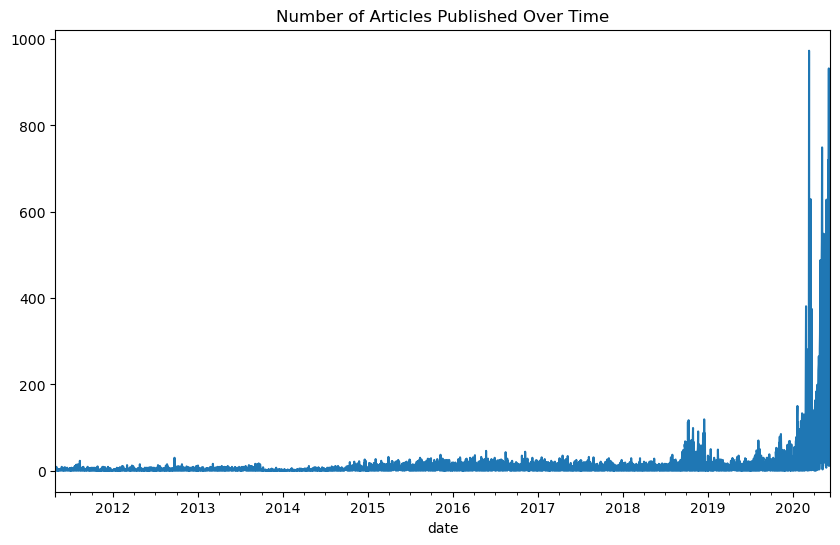

In [35]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from nltk.sentiment.vader import SentimentIntensityAnalyzer # type: ignore
import nltk # type: ignore
from nltk.corpus import stopwords # type: ignore
from nltk.tokenize import word_tokenize # type: ignore
from collections import Counter
import nltk # type: ignore
import re

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def descriptive_statistics(df):
    df['headline_length'] = df['headline'].apply(len)
    headline_stats = df['headline_length'].describe()
    print("Descriptive Statistics for Headline Lengths:\n", headline_stats)
    print("")

def articles_per_publisher(df):
    articles_per_publisher = df['publisher'].value_counts()
    print("Number of Articles per Publisher:\n", articles_per_publisher)
    print("")

def analyze_publication_dates(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.set_index('date', inplace=True)

    # Plot number of articles published over time
    df.resample('D').size().plot(figsize=(10,6))
    plt.title('Number of Articles Published Over Time')
    plt.show()

df = load_data('C:/Users/nejat/AIM Projects/week1 data/raw_analyst_ratings/raw_analyst_ratings.csv')
print(df.columns)

descriptive_statistics(df)
articles_per_publisher(df)
analyze_publication_dates(df)


In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

In [6]:
def sentiment_analysis(df):
    sid = SentimentIntensityAnalyzer()
    df['sentiment'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])
    df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
    sentiment_counts = df['sentiment_category'].value_counts()
    print("Sentiment Analysis:\n", sentiment_counts)
    print("")

def topic_modeling(df):
    stop_words = set(stopwords.words('english'))
    # Tokenize and remove stop words
    tokens = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
    # Flatten the list of tokens
    all_tokens = [word for sublist in tokens for word in sublist]
    
    # Count frequency of keywords
    common_keywords = Counter(all_tokens).most_common(20)
    print("Common Keywords:\n", common_keywords)
    print("")

sentiment_analysis(df)
topic_modeling(df)



Sentiment Analysis:
 sentiment_category
neutral     731893
positive    448740
negative    226695
Name: count, dtype: int64

Common Keywords:
 [('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528), ('top', 78493), ('benzinga', 74466), ('pt', 73059), ('announces', 66531), ('price', 64217), ('buy', 63928), ('downgrades', 61942), ('trading', 61146), ('raises', 57793), ('upgrades', 56802)]



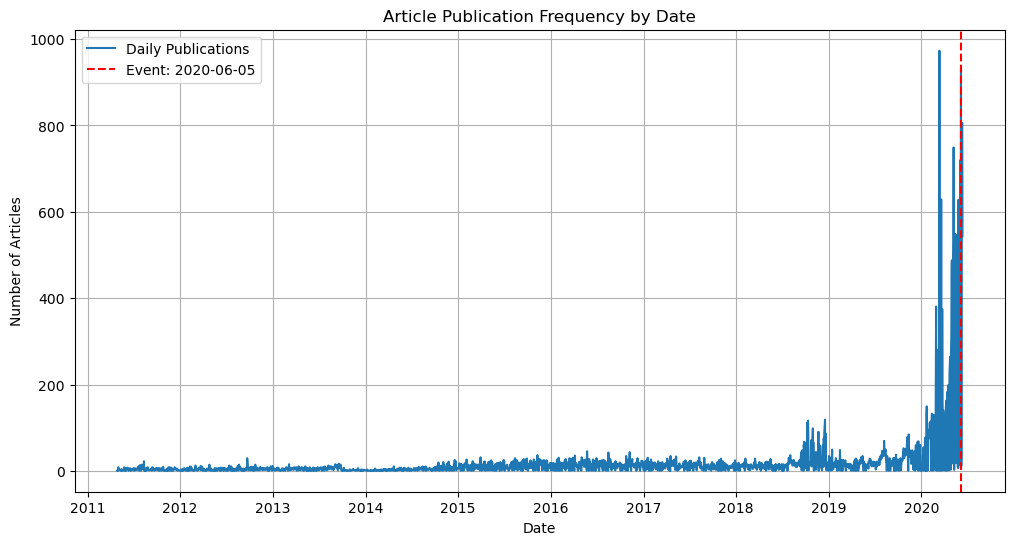

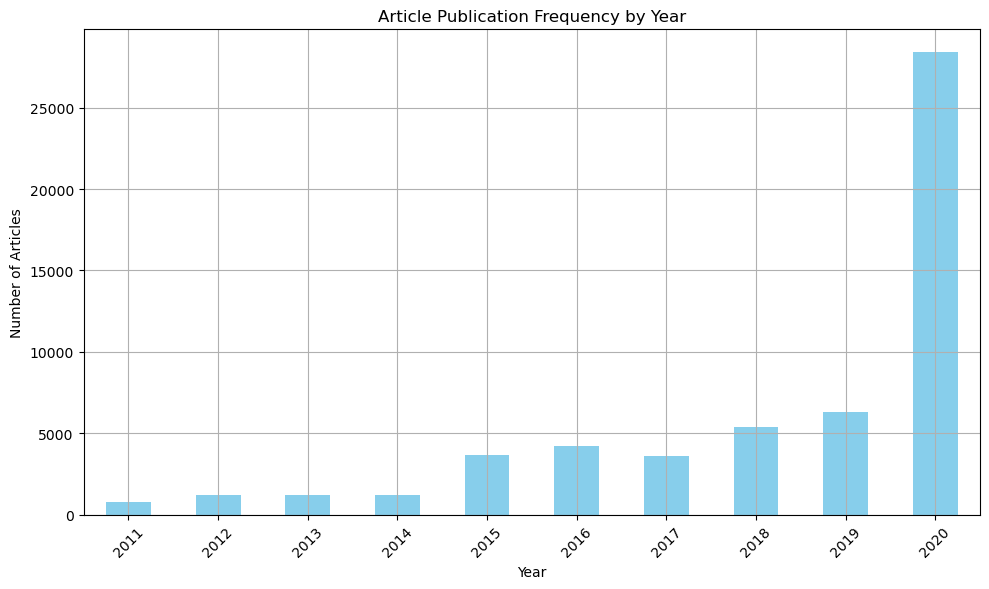

In [36]:
def analyze_publication_frequency(df, events=None):
    df = df.reset_index()
    if 'date' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'date' column. Please check column names.")
    
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

    daily_counts = df['date'].value_counts().sort_index()
    
    plt.figure(figsize=(12,6))
    daily_counts.plot(label='Daily Publications')
    
    # Highlight specific events
    if events:
        for event in events:
            plt.axvline(pd.to_datetime(event).date(), color='r', linestyle='--', label=f'Event: {event}')
    
    plt.title('Article Publication Frequency by Date')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.legend()
    plt.grid(True)
    plt.show()


def analyze_publication_patterns(df):
    df = df.reset_index()  
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)  

    # Group by year
    df['year'] = df['date'].dt.year
    yearly_counts = df['year'].value_counts().sort_index()

    # Plot publication frequency by year
    plt.figure(figsize=(10,6))
    yearly_counts.plot(kind='bar', color='skyblue')
    plt.title('Article Publication Frequency by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


analyze_publication_frequency(df, events=['2020-06-05'])
analyze_publication_patterns(df)


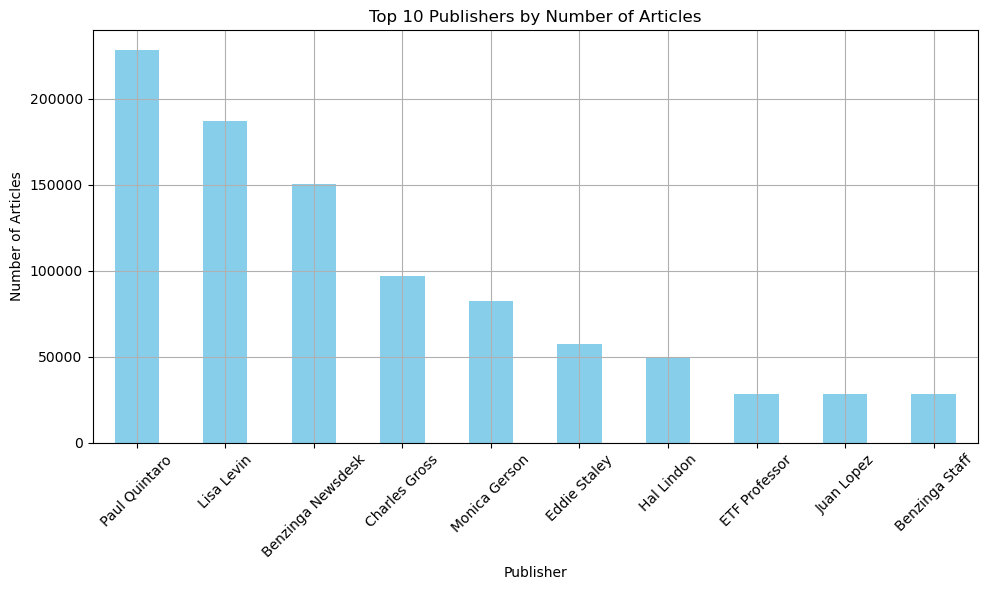

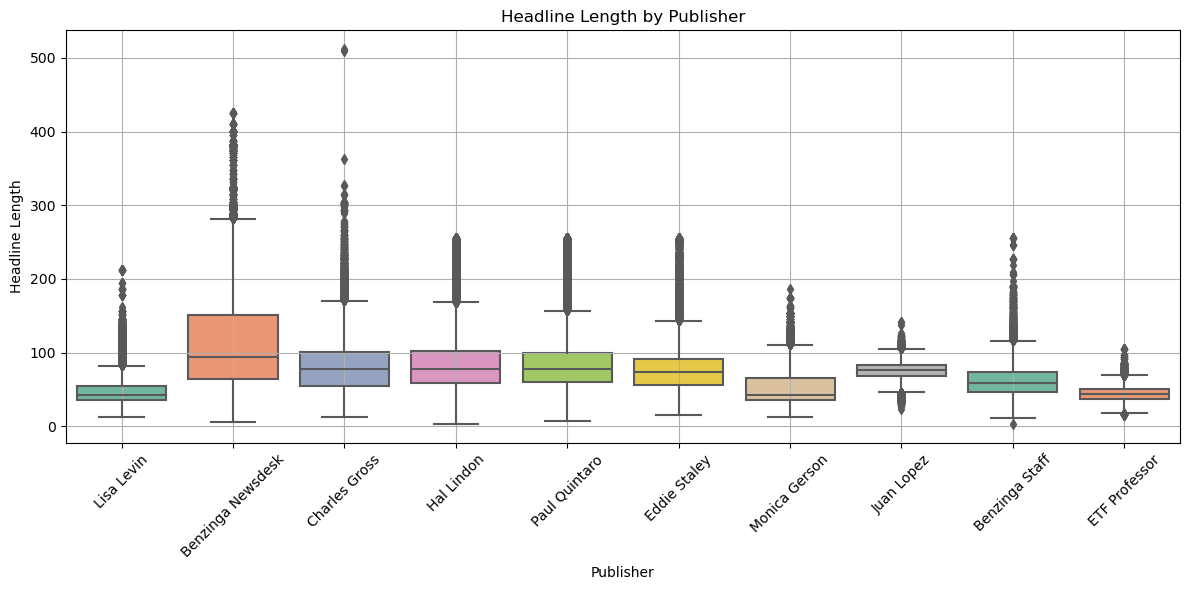

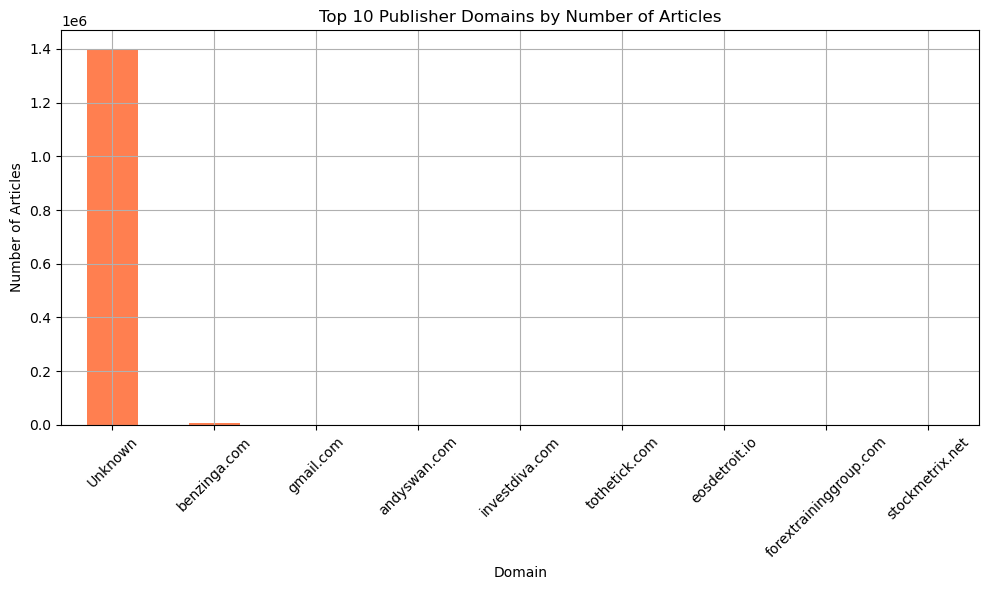

In [37]:
def analyze_top_publishers(df, top_n=10):
    if 'publisher' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'publisher' column.")

    publisher_counts = df['publisher'].value_counts().head(top_n)
    # Plot the top publishers
    plt.figure(figsize=(10,6))
    publisher_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Publishers by Number of Articles')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_headline_length_by_publisher(df, top_n=10):
    if 'publisher' not in df.columns or 'headline_length' not in df.columns:
        raise ValueError("The DataFrame does not contain 'publisher' or 'headline_length' columns.")
    # Get the top N publishers
    top_publishers = df['publisher'].value_counts().head(top_n).index

    # Filter DataFrame for top publishers
    top_df = df[df['publisher'].isin(top_publishers)]
    # Plot headline lengths by publisher
    plt.figure(figsize=(12,6))
    sns.boxplot(x='publisher', y='headline_length', data=top_df, palette='Set2')
    plt.title('Headline Length by Publisher')
    plt.xlabel('Publisher')
    plt.ylabel('Headline Length')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def extract_domains_from_emails(df):
    if 'publisher' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'publisher' column.")
    
    # to extract domain from email addresses
    def get_domain(email):
        match = re.search(r'@([\w\.-]+)', email)
        return match.group(1) if match else 'Unknown'
    # Create a new column for domains
    df['publisher_domain'] = df['publisher'].apply(get_domain)
    
    domain_counts = df['publisher_domain'].value_counts()
    # Plot the top domains
    plt.figure(figsize=(10,6))
    domain_counts.head(10).plot(kind='bar', color='coral')
    plt.title('Top 10 Publisher Domains by Number of Articles')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

analyze_top_publishers(df, top_n=10)
analyze_headline_length_by_publisher(df, top_n=10)
extract_domains_from_emails(df)
